GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('base_model', SVC())]),
             n_jobs=-1,
             param_grid={'base_model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                           10000],
                         'base_model__gamma': [0.0001, 0.001, 0.01, 1, 10, 100,
                                               1000]})
0.915625
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=1000, gamma=1))])
학습 결과 0.95
테스트 결과 0.9625


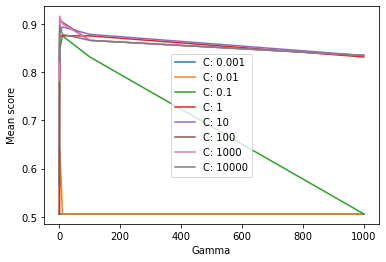

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


#시각화를 위한 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#데이터 불러오기
data = pd.read_csv("turtledata.csv")
col = list(map(str,data.columns))
x = data[col[:-1]]
y = data[col[-1]]

#PipeLine
scaler = StandardScaler()
base_model = SVC(kernel='rbf')
pipe = Pipeline([('scaler', scaler), ('base_model', base_model)])



# data split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# grid search을 통한 svm 파라미터 결정시 필요한 요소 설정
parameters = {'base_model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
          'base_model__gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]}
# grid search Part
grid = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# grid search 결과 출력
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print("학습 결과", grid.score(X_train, y_train))
print("테스트 결과", grid.score(X_test, y_test))



#시각화
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(parameters['base_model__C']), len(parameters['base_model__gamma']))
for ind, i in enumerate(parameters['base_model__C']):
    plt.plot(parameters['base_model__gamma'], scores[ind], label='C: ' + str(i))
    
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

# 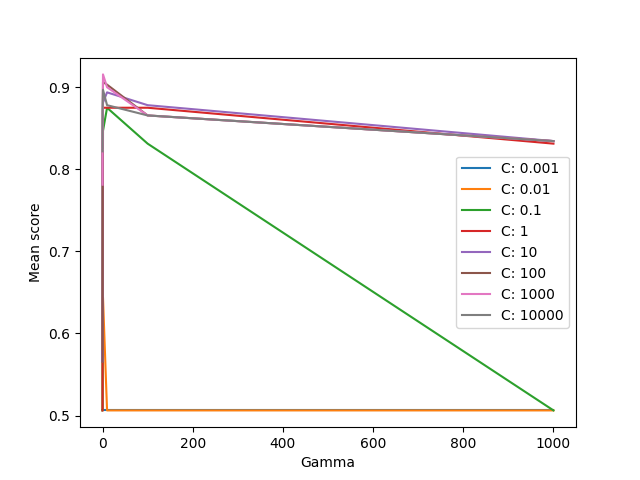